# Regression results using alternative difference-in-difference formulations as well as tests for heterogeneous marginal effects
#### Christopher Callahan
#### Christopher.W.Callahan.GR@dartmouth.edu

#### Mechanics
Dependencies

In [1]:
import xarray as xr
import numpy as np
import sys
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import signal, stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

Data locations

In [2]:
loc_coefs = "../Data/RegressionResults/"
loc_panel = "../Data/Panel/"
loc_simulations = "../Data/DL_Test/"

#### Analysis

alternative DID results

In [3]:
coef_discretized_yearfe = pd.read_csv(loc_coefs+"ENSO_discretized_yeareffects_test.csv",index_col=0)
coef_combinedindex_yearfe = pd.read_csv(loc_coefs+"ENSO_etau_yeareffects_test.csv",index_col=0)
coef_leadlag_yearfe = pd.read_csv(loc_coefs+"ENSO_discretized_yeareffects_test_leadlag.csv",index_col=0)

Plot

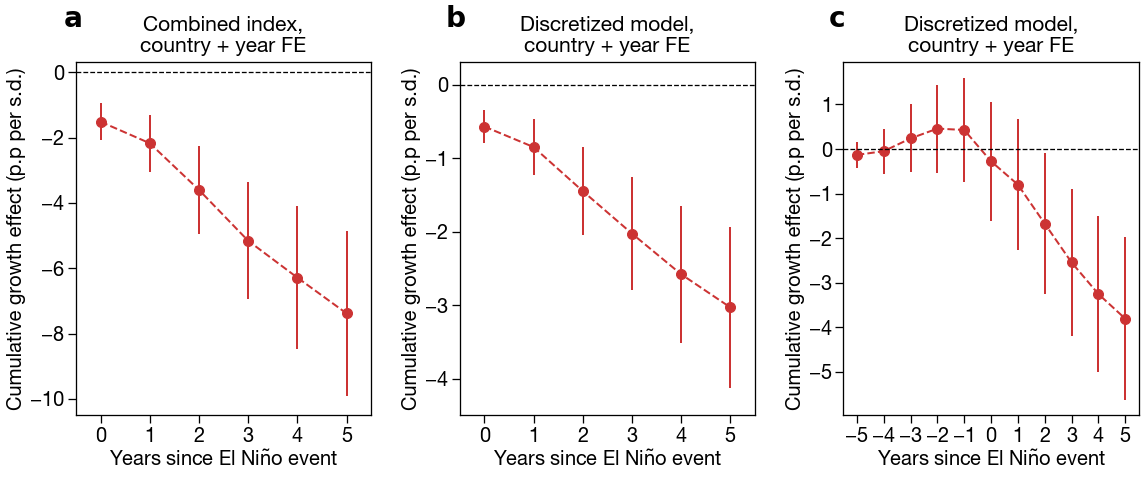

In [4]:
fig = plt.figure(figsize=(18,7))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20.0
rcParams["axes.linewidth"] = 1.3
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 1.3
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 1.3
rcParams["mathtext.default"] = "regular"

gs1 = gridspec.GridSpec(1,3)
gs1.update(left=0.12,right=0.94,top=0.84,bottom=0.14,wspace=0.3,hspace=0.32)

tfs = 21

for k in [0,1,2]:

    ax1 = plt.subplot(gs1[0,k])

    if k == 1:
        lags = coef_discretized_yearfe.lag.values
        beta = coef_discretized_yearfe.beta.values*100
        se = coef_discretized_yearfe.se.values*100
    elif k == 0:
        lags = coef_combinedindex_yearfe.lag.values
        beta = coef_combinedindex_yearfe.beta.values*100
        se = coef_combinedindex_yearfe.se.values*100
    elif k == 2:
        lags = coef_leadlag_yearfe.lag.values
        beta = coef_leadlag_yearfe.beta.values*100
        se = coef_leadlag_yearfe.se.values*100
        
    ci_lower = beta - 1.96*se
    ci_upper = beta + 1.96*se

    #plt.scatter(0,beta,s=120,color=[0.8,0.2,0.2])
    #plt.plot([0,0],[ci_lower,ci_upper],linewidth=2,color=[0.8,0.2,0.2])
    
    plt.plot(lags,beta,color=[0.8,0.2,0.2],marker='o',
             linewidth=2,linestyle="--",markersize=10)
    for ll in np.arange(0,len(lags),1):
        l = lags[ll]
        plt.plot([l,l],[ci_lower[ll],ci_upper[ll]],
                color=[0.8,0.2,0.2],linewidth=2)
    
    plt.axhline(y=0,color="black",linestyle="--",linewidth=1.3)
    plt.xticks(lags)
    plt.ylabel("Cumulative growth effect (p.p per s.d.)")
    plt.xlabel("Years since El Ni${\~n}$o event")
    if k < 2:
        plt.xlim([-0.5,5.5])
    else:
        plt.xlim([-5.5,5.5])
    
    if k == 1:
        plt.ylim([-4.5,0.3])
        plt.title("Discretized model,"+"\n"+"country + year FE",fontsize=tfs,pad=10)
    elif k == 2:
        plt.title("Discretized model,"+"\n"+"country + year FE",fontsize=tfs,pad=10)
    elif k == 0:
        plt.ylim([-10.5,0.3])
        plt.title("Combined index,"+"\n"+"country + year FE",fontsize=tfs,pad=10)

plt.figtext(0.11,0.91,r'$\bf{a}$',fontsize=28)
plt.figtext(0.405,0.91,r'$\bf{b}$',fontsize=28)
plt.figtext(0.7,0.91,r'$\bf{c}$',fontsize=28)

plt.savefig("../Figures/FigX_DiD_Tests.pdf")
plt.show()

In [5]:
beta + (1.96*se)

array([ 0.13554118,  0.43837535,  0.98038906,  1.42447914,  1.58309048,
        1.03091263,  0.64200456, -0.1159804 , -0.90950467, -1.52932952,
       -1.99851332])

Effects in rolling windows

In [6]:
coef_windows = pd.read_csv(loc_coefs+"ENSO_mainmodel_runningblocks_test.csv",index_col=0)
coef_countries = pd.read_csv(loc_coefs+"ENSO_mainmodel_excludecountries_test.csv",index_col=0)
coef_years = pd.read_csv(loc_coefs+"ENSO_mainmodel_excludeyears_test.csv",index_col=0)

In [7]:
orig_beta = (-0.04685)*100
orig_se = 0.005960498*100

In [8]:
coef_years.sort_values("beta",ascending=False)

,year,beta,se,p
24,1983,-0.042925,0.006117,0
14,1973,-0.044738,0.006395,0
51,2010,-0.044984,0.005962,0
52,2011,-0.045109,0.005958,0
25,1984,-0.045496,0.006132,0
27,1986,-0.045668,0.006001,0
53,2012,-0.045728,0.005927,0
40,1999,-0.045756,0.006210,0
23,1982,-0.045953,0.005957,0
21,1980,-0.046116,0.005991,0


0.9704508143373979
1.000132873207039
0.9995495747149343


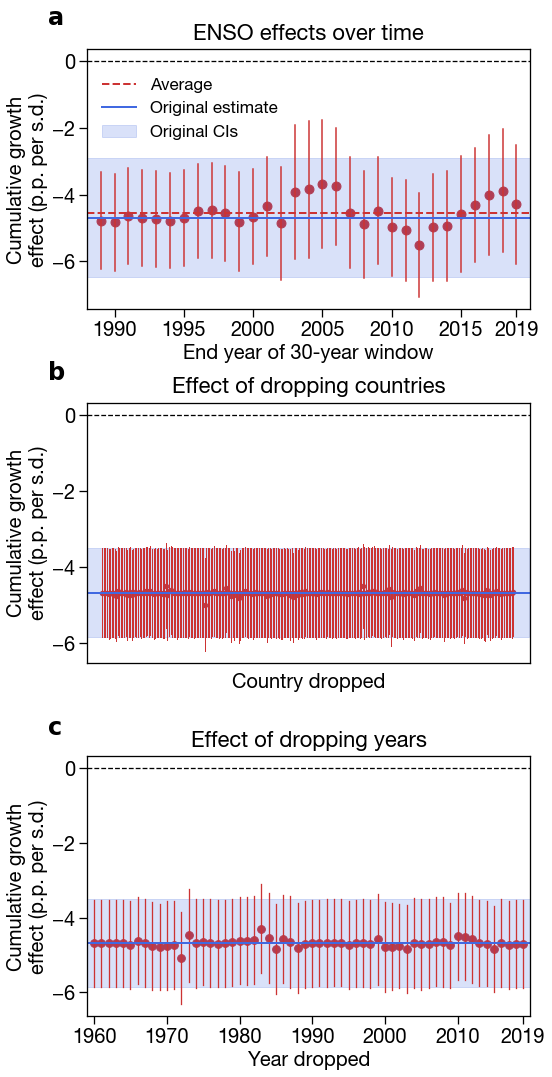

In [9]:
fig = plt.figure(figsize=(8,17))
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Helvetica Neue"]
rcParams["font.size"] = 20.0
rcParams["axes.linewidth"] = 1.3
rcParams['xtick.major.size'] = 8
rcParams['xtick.major.width'] = 1.3
rcParams['ytick.major.size'] = 8
rcParams['ytick.major.width'] = 1.3
rcParams["mathtext.default"] = "regular"

gs1 = gridspec.GridSpec(3,1)
gs1.update(left=0.17,right=0.94,top=0.91,bottom=0.12,wspace=0.3,hspace=0.36)

tfs = 22

for k in [0,1,2]:
    ax = plt.subplot(gs1[k,0])
    
    if k == 0:
        df = coef_windows
    elif k == 1:
        df = coef_countries
    elif k == 2:
        df = coef_years

    if k == 0:
        y2 = df.y2.values
        plt.scatter(y2,df.beta*100,marker="o",color=[0.8,0.2,0.2],s=80)

        for yy in y2:
            beta = coef_windows.loc[coef_windows.y2==yy,"beta"]*100
            se = coef_windows.loc[coef_windows.y2==yy,"se"]*100
            plt.plot([yy,yy],[beta-(1.96*se),beta+(1.96*se)],
                    color=[0.8,0.2,0.2],linewidth=1.5)

        plt.xlim([y2[0]-1,y2[-1]+1])
        plt.xlabel("End year of 30-year window")
        plt.title("ENSO effects over time",fontsize=tfs,pad=10)
        plt.xticks([1990,1995,2000,2005,2010,2015,2019])
    
    elif k == 1:
        isos = df.iso.values
        x = np.arange(0,len(isos),1)
        plt.scatter(x,df.beta*100,marker="o",color=[0.8,0.2,0.2],s=20)
        for ii in np.arange(0,len(isos),1):
            i = isos[ii]
            beta = df.loc[df.iso==i,"beta"]*100
            se = df.loc[df.iso==i,"se"]*100
            plt.plot([ii,ii],[beta-(1.96*se),beta+(1.96*se)],
                    color=[0.8,0.2,0.2],linewidth=1)
        
        plt.xticks([])
        plt.xlim([x[0]-10,x[-1]+11])
        plt.xlabel("Country dropped",labelpad=10)
        plt.title("Effect of dropping countries",fontsize=tfs,pad=10)
        
    elif k == 2:
        yrs = df.year.values
        x = np.arange(0,len(yrs),1)
        plt.scatter(yrs,df.beta*100,marker="o",color=[0.8,0.2,0.2],s=60)
        for yy in np.arange(0,len(yrs),1):
            y = yrs[yy]
            beta = df.loc[df.year==y,"beta"]*100
            se = df.loc[df.year==y,"se"]*100
            plt.plot([y,y],[beta-(1.96*se),beta+(1.96*se)],
                    color=[0.8,0.2,0.2],linewidth=1.3)
        
        plt.xticks([1960,1970,1980,1990,2000,2010,2019])
        plt.title("Effect of dropping years",fontsize=tfs,pad=10)
        plt.xlabel("Year dropped")
        plt.xlim([1959,2020])
        
    plt.axhline(y=0,color="black",linewidth=1.3,linestyle="--")
    plt.axhline(np.mean(df.beta.values)*100,
                color=[0.8,0.2,0.2],linewidth=2,linestyle="--",
               label="Average")    
    plt.axhline(y=orig_beta,color="royalblue",linewidth=2,linestyle="-",
               label="Original estimate")
    print((np.mean(df.beta.values)*100)/orig_beta)
    #print(orig_beta)
    
    if k == 0:
        ax.fill_between(np.arange(y2[0]-1,y2[-1]+2,1),
                        orig_beta+(1.96*se),orig_beta-(1.96*se),
                        color="royalblue",alpha=0.2,label="Original CIs")
        plt.legend(loc="upper left",fontsize=17,frameon=False,
                  bbox_to_anchor=(0,0.95,0,0))

    if k == 1:
        ax.fill_between(np.arange(x[0]-10,x[-1]+11,1),
                        orig_beta+(1.96*se),orig_beta-(1.96*se),
                        color="royalblue",alpha=0.2)
    if k == 2:
        ax.fill_between(np.arange(yrs[0]-1,yrs[-1]+2,1),
                        orig_beta+(1.96*se),orig_beta-(1.96*se),
                        color="royalblue",alpha=0.2)
        
    plt.ylabel("Cumulative growth"+"\n"+"effect (p.p. per s.d.)")


plt.figtext(0.1,0.93,r'$\bf{a}$',fontsize=24)
plt.figtext(0.1,0.64,r'$\bf{b}$',fontsize=24)
plt.figtext(0.1,0.35,r'$\bf{c}$',fontsize=24)

plt.savefig("../Figures/FigX_TWFE_Diagnostics.pdf")
plt.show()